# CAR PRECE PREDICTION
    Description
    This dataset contains information about used cars.
    This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.


The columns in the given dataset are as follows:

    name
    year
    selling_price
    km_driven
    fuel
    seller_type
    transmission
    Owner

#### Initail steps in cmd, before this notebook

##### Step 1: Create my  own env carprediction with a specific version of Python:

        conda create -n carprediction python=3.6

##### Step 2: To open Myenv jupiter notebook from cmd by giving full path and typing jupyter notebook

        (base) C:\Users\prabh\DS Project Toolkit\Project\Car_Price_Predict>jupyter notebook
        
        > Then we wil go inside jupiter folder and created this notebook

In [1]:
!pip install pywebio

Traceback (most recent call last):
  File "C:\Users\prabh\Anaconda3\Scripts\pip-script.py", line 6, in <module>
    from pip._internal.cli.main import main
  File "C:\Users\prabh\Anaconda3\lib\site-packages\pip\_internal\cli\main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "C:\Users\prabh\Anaconda3\lib\site-packages\pip\_internal\cli\autocompletion.py", line 9, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "C:\Users\prabh\Anaconda3\lib\site-packages\pip\_internal\cli\main_parser.py", line 7, in <module>
    from pip._internal.cli import cmdoptions
  File "C:\Users\prabh\Anaconda3\lib\site-packages\pip\_internal\cli\cmdoptions.py", line 23, in <module>
    from pip._internal.cli.progress_bars import BAR_TYPES
  File "C:\Users\prabh\Anaconda3\lib\site-packages\pip\_internal\cli\progress_bars.py", line 12, in <module>
    from pip._internal.utils.logging import get_indentation
  File "C:\Users\prabh\A

## Importing Data - EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
import pickle

In [3]:
df = pd.read_csv(r'./car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


> By this we come to know Fuel_Type ,Seller_Type,Transmission are categorial

> Owner also looks like unique value

### Check the unique value

In [5]:
print(df.Fuel_Type.unique())
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


### Check the Notnull value


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

> Looks like no null value

### Check some description

In [7]:
df.shape

(301, 9)

> 301 row, 9 col

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


> Here year feature is there, so we can see how old by substracting this year to know how much depriciation in price


In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

### Feature Selection 

> Remove car_name, which no necessary

In [10]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [11]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


> Add new col Current_year

In [12]:
final_dataset['Current_year'] = 2021  # Passed as int , not as str(not inside '')

In [13]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [14]:
final_dataset['No_year']=final_dataset['Current_year'] - final_dataset['Year']

In [15]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


> Drop Year, Current_year

In [16]:
final_dataset.drop(['Year','Current_year'], axis = 1, inplace =True)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


### Convert Categorial Feature to Numeric by using Onehot Encoding  coz less unique value

>  Seller_Type,	Transmission,	Owner

In [18]:
## Apply onehot encoding

final_dataset = pd.get_dummies(final_dataset, drop_first=True)


In [19]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


-   Here Automatically converts only categorial variable, no need to mention col(Owner is not categorial its a intrger, so didnt converted)


- Mentioned drop_first=True, so in case of Fuel_Type we had 3 value (Diesel,Petrol,CNG), it ignores one extra col for cng and if both other col value 0 means its CNG

### Check the correlation between the col

In [20]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


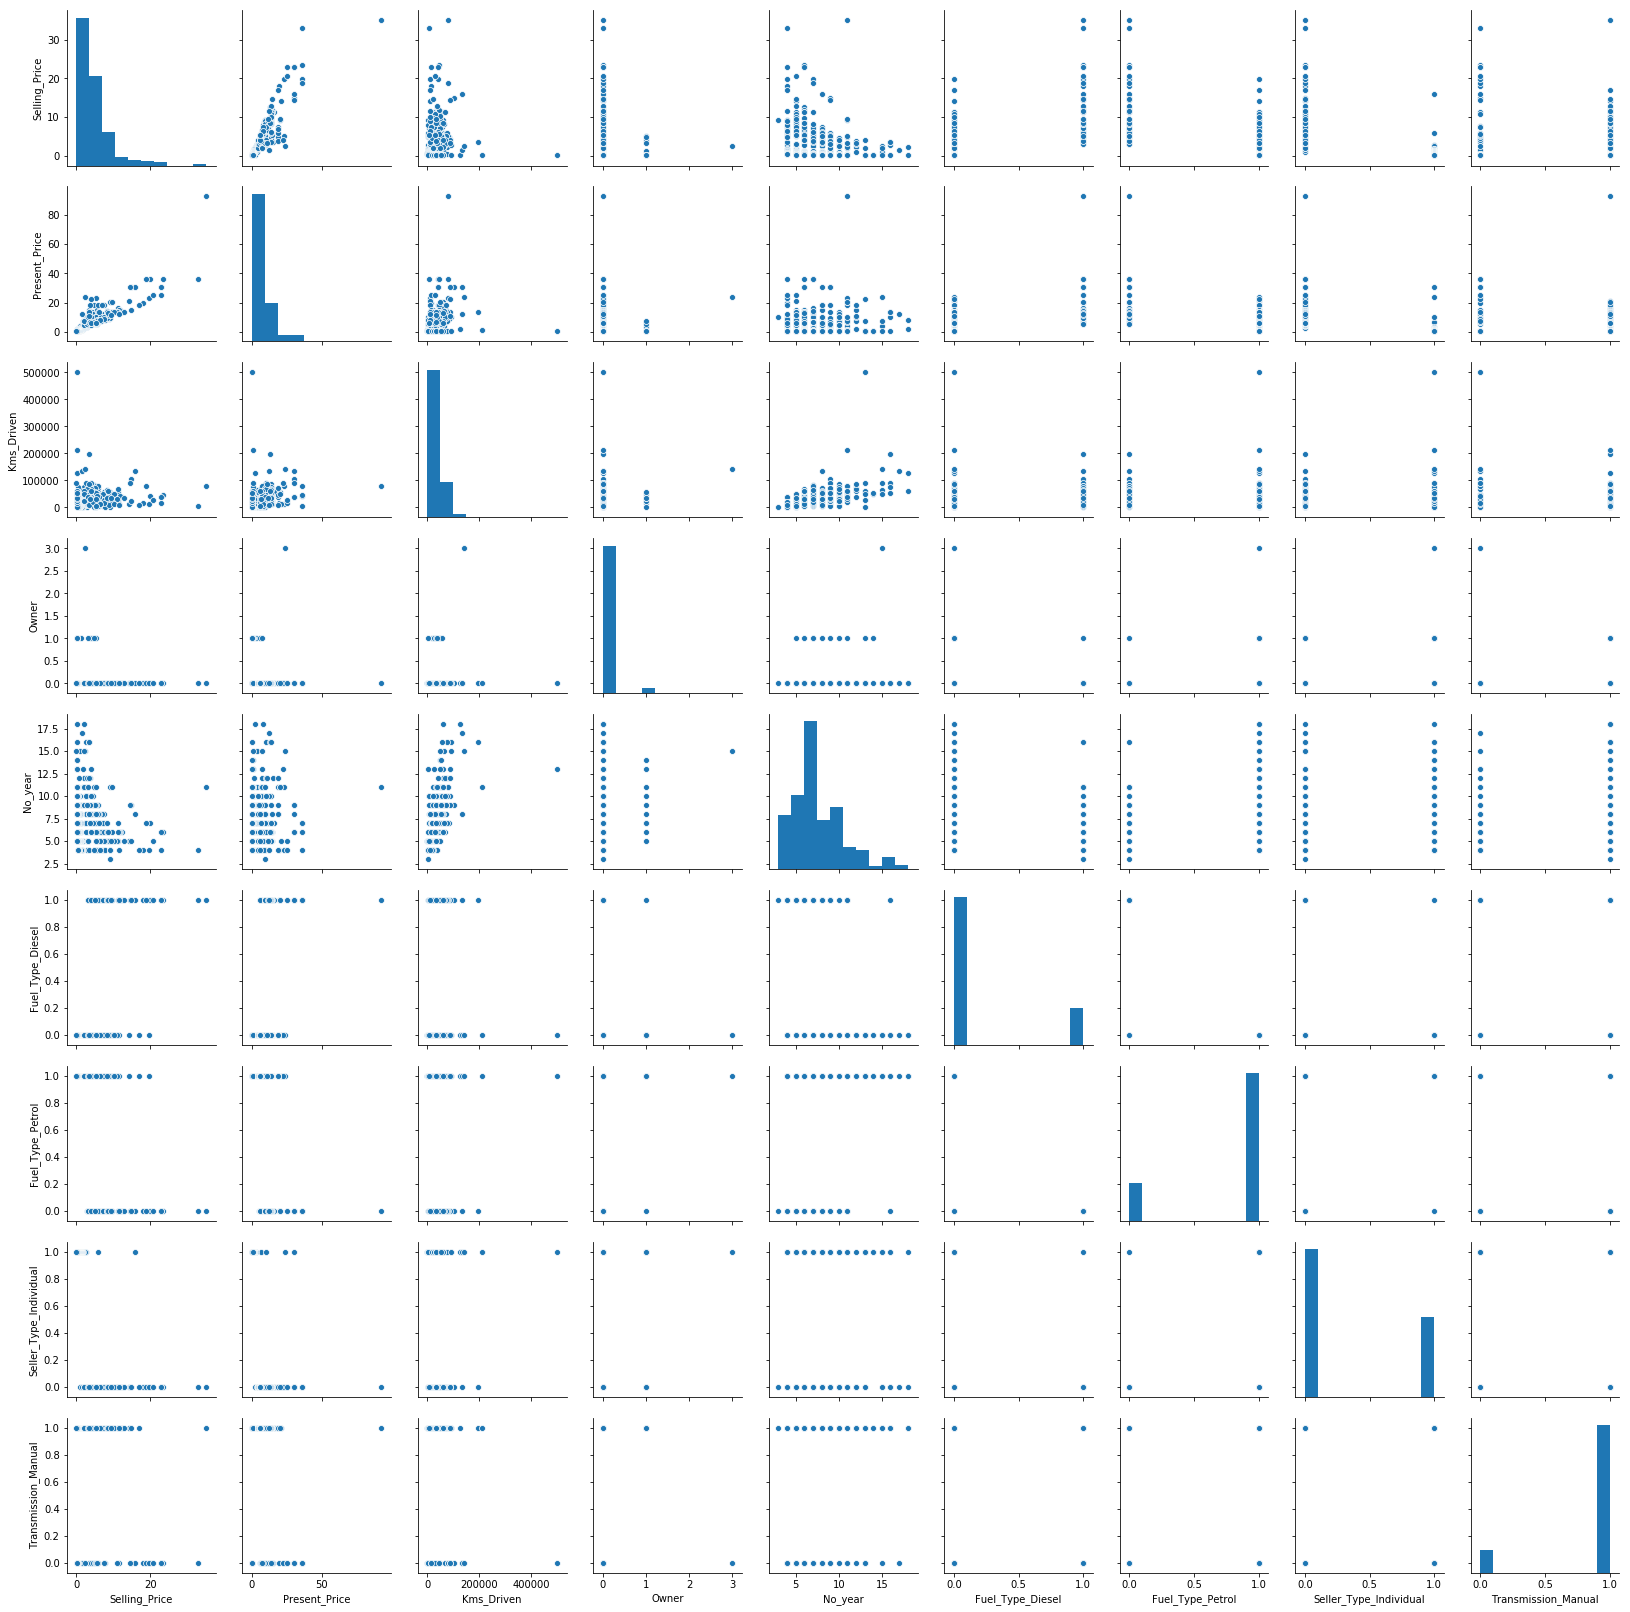

In [21]:
sns.pairplot(final_dataset)

> Plot in heat map

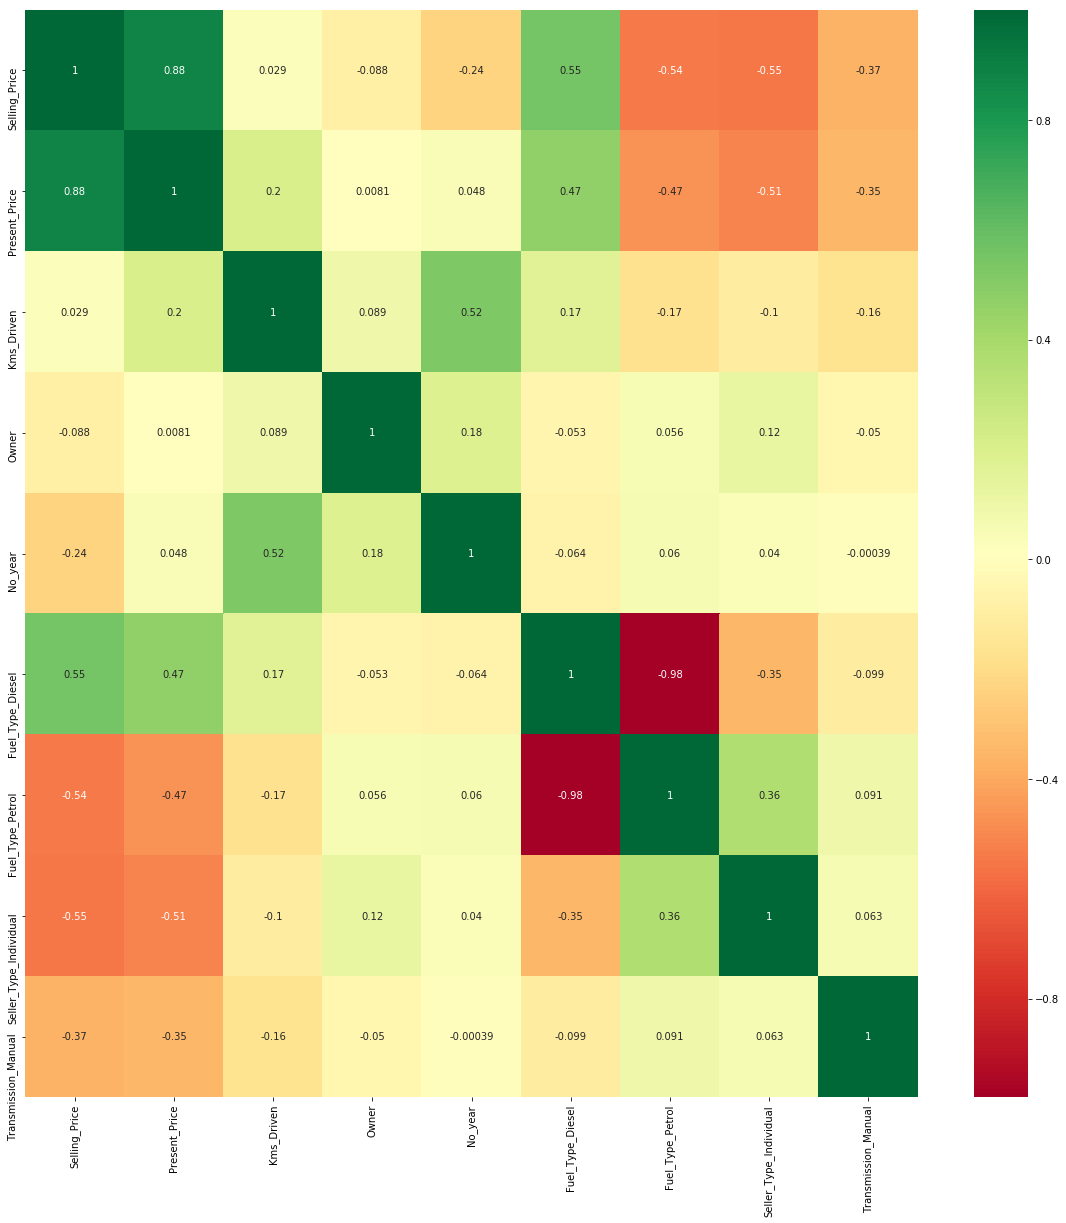

In [22]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#Plot Heatmap
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")

## here annot will enable col name in x and y axis

> By seeing this, we can remove highly correlated features if more col are there, in this case less columns so not removing anything

> In other problem, we can set filter condition of threshold and can keep only selcted field and remove above that threashold as highly correlated and below that -ve threshold as highly -vely correlated. Both will proide same info, so no need to keep both , one is enough to explain op

## Model Build

In [23]:
#Independent Features
X = final_dataset.iloc[:,1:]
#Dependent Features
y = final_dataset.iloc[:,0]

In [24]:
X.head()

,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [25]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## Feature Importance

> Ordering of the important Feature can be found by this feature importance method

In [26]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [27]:
print(model.feature_importances_)

[3.98490744e-01 3.92799537e-02 3.61556374e-04 7.78632904e-02
 2.10281306e-01 1.04970544e-02 1.26925928e-01 1.36300167e-01]


> By looking this 1st col(Present_Price) has more importance then 5th col (Fuel_Type_Diesel)

Present_Price             0.398491
Kms_Driven                0.039280
Owner                     0.000362
No_year                   0.077863
Fuel_Type_Diesel          0.210281
Fuel_Type_Petrol          0.010497
Seller_Type_Individual    0.126926
Transmission_Manual       0.136300
dtype: float64


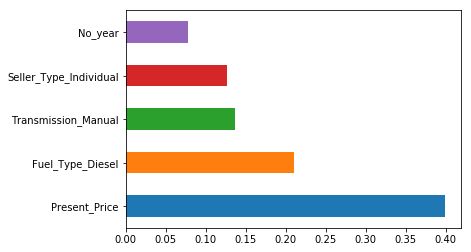

In [28]:
#Create series with col
feat_importance = pd.Series(model.feature_importances_, index = X.columns)
print(feat_importance)
#Order and take 1st 5 largest
feat_importance.nlargest(5).plot(kind='barh')  
#kind= 'barh' will give bar horizontal plot with index as bar name
plt.show()

> Normally by using feature importance top few features only used for training, but here we have very less col, so taking all

### Train test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 5 , test_size = 0.20)

In [30]:
X_train.shape

(240, 8)

In [31]:
X_test.shape

(61, 8)

### Use the RandomForset Regressor  

In [32]:
rf_random = RandomForestRegressor()
# shift+ Tab to know related parameter in model
#In RF, we need to do hyper parameter tuning else do overfit

""" By Defalt value

RandomForestRegressor(
    ['n_estimators=100', "criterion='mse'", 'max_depth=None', 'min_samples_split=2', 
    'min_samples_leaf=1', 'min_weight_fraction_leaf=0.0', "max_features='auto'", 
    'max_leaf_nodes=None', 'min_impurity_decrease=0.0', 'min_impurity_split=None',
    'bootstrap=True', 'oob_score=False', 'n_jobs=None', 'random_state=None', 'verbose=0',
    'warm_start=False', 'ccp_alpha=0.0', 'max_samples=None'],
)
"""
# Criteria for regressor default is mse - mean squared error

' By Defalt value\n\nRandomForestRegressor(\n    [\'n_estimators=100\', "criterion=\'mse\'", \'max_depth=None\', \'min_samples_split=2\', \n    \'min_samples_leaf=1\', \'min_weight_fraction_leaf=0.0\', "max_features=\'auto\'", \n    \'max_leaf_nodes=None\', \'min_impurity_decrease=0.0\', \'min_impurity_split=None\',\n    \'bootstrap=True\', \'oob_score=False\', \'n_jobs=None\', \'random_state=None\', \'verbose=0\',\n    \'warm_start=False\', \'ccp_alpha=0.0\', \'max_samples=None\'],\n)\n'

### Hyperparameter

In [33]:
# No of trees in RF
n_estimators = [int(x) for x in np.linspace(start =100, stop = 1200, num =12) ]
# No of Features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum no of levels in trees
max_depth = [int(x) for x in np.linspace(start =5, stop = 30, num =6) ]
#max_depth.append(None)
# Minimum no of samples req to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum no of samples req at each leaf node
min_samples_leaf = [1, 2, 5, 10]

print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


### Randomsearch CV

- This is fast compared to Gridsearch CV

In [34]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               
              }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()


# Random search of parameters, using 5 fold cross validation, 
# search across 500 different combinations
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5, 
                               verbose=2,  #To display below value during fit
                               random_state=42, 
                               n_jobs = 1)

In [36]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   37.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [37]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

> This is the best fitted hyperparameter

In [38]:
rf_random.best_score_

-4.161271397845103

In [39]:
predictions=rf_random.predict(X_test)
print(predictions)

[ 8.58039589  8.61620071  4.38657817  5.01646754  2.73698274  9.22318327
  8.54242975  0.68512254 20.94963282  4.99754191  5.58176749  7.50281323
  3.94132084  5.01625697  0.4561897   2.93719509  6.78233731  0.48331687
  6.87464424  0.42782759  4.71245488 21.7329909  21.41341832  1.01623467
  2.7557381   4.70252157  5.28372458  7.8905679   5.68035786  4.72835974
  4.80032627 10.39498346  4.79365575  0.29207629  0.329757    5.29703252
  7.75226377  5.27987598  1.2589081   2.44484444  0.72420066  5.24982765
 14.62343659  0.20510745  1.15264535  4.66369639  0.2885052   7.89212259
  3.02984183  4.95780186  4.32835478 20.06832782  2.89478293  1.25644343
  0.35201458  0.24467423  2.797473    0.34119289  0.40000642  0.70534454
  0.55080667]


### Compare/Evaluate the result

C:\Users\prabh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


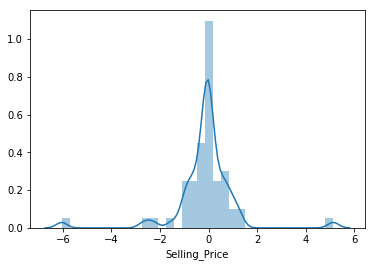

In [40]:
##Distplot used

sns.distplot(y_test-predictions)

> Here prediction are good, there is less difference between actual and predicted.Always diff should be minimum. all difference centered at 0

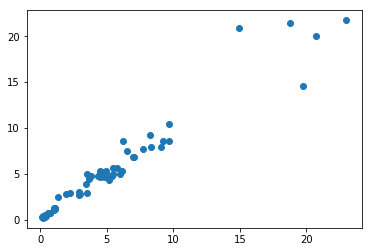

In [41]:
plt.scatter(y_test,predictions)

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6614112069381244
MSE: 1.5470011099478083
RMSE: 1.2437849934565894


## Deployment

### Create Pickle file

- This is the serialized file for deployment

- Then create the req.txt file in cmd environment by activating our environment

        - activate 

In [43]:
import pickle
# open a file, where you want to store the data
# It creates pickle file by this name in that location which is wb- wrirte byte mode
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [44]:
pd.read_pickle ('random_forest_regression_model.pkl ')

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

### Run the below command in cmd to create requirement.txt file

> Command in cmd:
Way 1:

        activate myenv 
        pip freeze > requirements.txt


>Way 2:
> But in my case it gave only 2 library inside requirement.txt file, so ran below one . gave many files.

        conda list -e > requirements.txt

> Now the model file is created.

> Way 3:

        Make sure to run pip3 for python3.7.
        pip3 freeze >> requirements.txt
        
-----------------------------------
 
### template folder and file creation

> For web display, we need to create one folder in our proj folder with name template and inside need to create index.html  file
index.html  and app.py will have relationship and pass the value to display in web

-----------------------------------
### Procfile

A Procfile is a file named Procfile . It should be named Procfile exactly, and not anything else. For example, Procfile.txt is not valid

A file named Procfile is required in the root of your Heroku project.

gunicorn doesn't work on Windows so you'll want a Procfile.windows that will locally host your app in a way that doesn't require gunicorn (such as the way you would normally do it).


Inside Procfile: write your own application name instead of app_name and file name just save without any Extention (Procfile).

Inside:
web: gunicorn app:app

A Procfile is a mechanism for declaring what commands are run by your application's containers on the Deis platform. 
It follows the process model. You can use a Procfile to declare various process types, such as multiple types of workers, 
a singleton process like a clock, or a consumer of the Twitter streaming API.


Create Proc file:

In cmd write below line
echo web: web: gunicorn app:app >Procfile

Steps:
Login to your Heroku account using CLI. ...
Create a web app on Heroku. ...
Create requirements.txtfile in the same project directory. ...
Create a Procfile. ...
Create runtime.txt to specify the Python version at runtime. ...
Initialize an empty git repository and push the code.

-----------------------------------

###  app.py file

> Create app.py file manually in our project folder with necessory changes. This req for Web Display
If it fails with any error of package installation, then pip install that and generate requirement.txt file again run below command

        Run app.py in our env in cmd: 

        python app.py

End we will get one url,copy paste in chrome and run
Ex:  http://127.0.0.1:5000/

> But i faced error jinja2.exceptions.TemplateNotFound: index.html, so stopped here. 
    
    > But if no issue, we should get web browsr to give all input as drop down and calculate the current price

### DEPLOYMENT:Azure or Heruku platform

##### HERUKU:

Cloud aplication Platform


Heroku is a container-based cloud Platform as a Service (PaaS). Developers use Heroku to deploy, manage, and scale modern apps. 
Our platform is elegant, flexible, and easy to use, offering developers the simplest path to getting their apps to market.

1) Before deploy clone all our code project folder in github

2) Heruku platform to deploy our code by creating new app(Providing app name)

3) In deploy section "Deployment method" as Github, Provide outr github repository name and Repo name: Give our github carprediction folder name by searching there

4) After connecting reponame, just "deploy Branch" option.

5) Build master tab will show the deployment process

6) After deployement click on view, we can get the web page we built for prediction.

